In [ ]:
import numpy as np
from keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Folders = ['क','ख','ग','घ','ङ','च','छ','ज','झ','ञ','ट','ठ','ड','ढ','ण','त','थ','द','ध','न','प','फ','ब','भ','म','य','र','ल','व','श','ष','स','ह','क्ष','त्र','ज्ञ', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
imagepath1 = '/content/drive/My Drive/DevnagariCharacterDetection/Deploy/TestImages/ek.png'
imagepath2 = '/content/drive/My Drive/DevnagariCharacterDetection/Deploy/TestImages/gha2.jpg'
imagepath3 = '/content/drive/My Drive/DevnagariCharacterDetection/Deploy/TestImages/ja.png'
imagepath4 = '/content/drive/My Drive/DevnagariCharacterDetection/Deploy/TestImages/ka2.png'
imagepath5 = '/content/drive/My Drive/DevnagariCharacterDetection/Deploy/TestImages/ka3.png'
imagepath6 = '/content/drive/My Drive/DevnagariCharacterDetection/Deploy/TestImages/pa.jpg'
imagepath7 = '/content/drive/My Drive/DevnagariCharacterDetection/Deploy/TestImages/tin.png'

In [ ]:
# # Load the model
# model = load_model('/content/drive/My Drive/DevnagariCharacterDetection/Deploy/Models/CNNAdam.h5', compile=False)
model2 = load_model('/content/drive/My Drive/DevnagariCharacterDetection/Deploy/Models/LSTM2adam.h5', compile=False)
model3 = load_model('/content/drive/My Drive/DevnagariCharacterDetection/Deploy/Models//LSTM2SGDm.h5', compile=False)

In [ ]:
def predict(path):

  image = cv2.imread(path)
  resized = cv2.resize(image, (32, 32))

  # Blur and sharpen the image
  blurred_image = cv2.GaussianBlur(resized, (5, 5), 0)
  sharpened_image = cv2.addWeighted(resized, 1.5, blurred_image, -0.5, 0)
  cv2_imshow(sharpened_image)

  # Resize the image and convert to grayscale
  gray = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)
  # gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

  # Normalize the pixel values to the [0, 1] range
  resized_normalized = gray.astype('float32') / 255.0

  # Expand dimensions to match the input shape expected by the model
  data = np.expand_dims(resized_normalized, axis=0)

  # Perform prediction
  prediction2 = model2.predict(data)
  prediction3 = model2.predict(data)

  index2 = np.argmax(prediction2)
  predict2 = Folders[index2]
  print('LSTM with Adam Optimizer: ',predict2)

  index3 = np.argmax(prediction2)
  predict3 = Folders[index3]
  print('LSTM with SGD and momentum Optimizer: ',predict3)

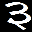

1/1 [==============================] - 0s 49ms/step
LSTM with Adam Optimizer:  3
LSTM with SGD and momentum Optimizer:  3


In [ ]:
predict(imagepath7)